In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data Train Load dataset
datatrain = pd.read_csv("/home/systemcommand/anggy/app/data/trainanggy.csv", delimiter=',')
datatrain.head()

,T,B,SU1,SU2,RT1,RT2,RT3,RT4,I1,I2,N1,N2,N3,J
0,2017,Januari,14835,18172,14183,24728,841756,201048,46800,39938,56324,32492,5994,1296270
1,2017,Februari,14893,19026,14371,24394,832284,200774,47536,37282,57218,31412,5329,1284519
2,2017,Maret,13676,17706,13864,23071,789354,197318,41005,35755,55068,30468,5737,1223022
3,2017,April,15780,20222,15791,26153,893393,224847,47793,38759,63590,34198,6926,1387452
4,2017,Mei,15698,17508,14863,24681,851205,222635,45794,37655,60998,26452,5915,1323404


In [3]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       24 non-null     int64 
 1   B       24 non-null     object
 2   SU1     24 non-null     int64 
 3   SU2     24 non-null     int64 
 4   RT1     24 non-null     int64 
 5   RT2     24 non-null     int64 
 6   RT3     24 non-null     int64 
 7   RT4     24 non-null     int64 
 8   I1      24 non-null     int64 
 9   I2      24 non-null     int64 
 10  N1      24 non-null     int64 
 11  N2      24 non-null     int64 
 12  N3      24 non-null     int64 
 13  J       24 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 2.8+ KB


In [4]:
# EDA/ data description
this = datatrain.copy()
this.describe()

,T,SU1,SU2,RT1,RT2,RT3,RT4,I1,I2,N1,N2,N3,J
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,2017.500000,16104.916667,18290.208333,16534.291667,24995.458333,852528.62500,250181.791667,49658.750000,41513.708333,62788.500000,31665.083333,6312.791667,1.370574e+06
std,0.510754,1264.363525,1241.900471,1881.335453,1115.935170,33973.08554,29215.222834,3421.754727,4409.177016,4970.613609,3459.028827,585.891144,7.163533e+04
min,2017.000000,13676.000000,15291.000000,13584.000000,22892.000000,774140.00000,197318.000000,41005.000000,33836.000000,54898.000000,23525.000000,5329.000000,1.223022e+06
25%,2017.000000,15246.500000,17696.500000,15420.250000,24221.500000,839388.00000,229978.750000,47423.000000,38483.000000,59764.000000,29437.000000,5797.750000,1.321748e+06
50%,2017.500000,15957.000000,18305.500000,16122.000000,24905.500000,854607.50000,255383.500000,49450.000000,40874.500000,63619.500000,32318.500000,6184.500000,1.379902e+06
75%,2018.000000,17105.250000,19032.500000,17938.000000,25862.250000,875528.50000,271391.000000,52196.750000,44572.750000,65514.750000,33680.000000,6865.000000,1.418112e+06
max,2018.000000,18750.000000,20804.000000,20184.000000,27067.000000,911332.00000,295305.000000,56538.000000,49724.000000,74471.000000,37372.000000,7422.000000,1.482129e+06


In [5]:
# Preprocessing
train = this.drop(['T','B'],axis=1)

# Preprocessing/ transform(normalizing)
scaler = preprocessing.MinMaxScaler().fit(train)
data_train = scaler.transform(train)

In [6]:
# Selecting Variables
datax = []
for i in range(len(data_train)):
    tes = data_train[i][:11]
    datax.append(tes)

datay = []
for i in range(len(data_train)):
    tes = data_train[i][-1]
    datay.append(tes)

x = np.array(datax,np.float32)
y = np.array(datay,np.float32)

print(x.shape)

(24, 11)


In [7]:
# Data Test Load dataset
datatest = pd.read_csv("/home/systemcommand/anggy/app/data/testanggy.csv", delimiter=',')
test = datatest.copy()

In [8]:
# Preprocessing
testing = test.drop(['T','B'],axis=1)

# Preprocessing/ Transform(normalizing)
scaler = preprocessing.MinMaxScaler().fit(testing)
data_test = scaler.transform(testing)

In [9]:
# Selecting Variables

datax1 = []
for i in range(len(data_test)):
    tes = data_test[i][:11]
    datax1.append(tes)

datay1 = []
for i in range(len(data_test)):
    tes = data_test[i][-1]
    datay1.append(tes)

xx = np.array(datax1,np.float32)
yy = np.array(datay1,np.float32)

In [10]:
# Define parameters
n = x.shape[1]
m = 8
M = 1
init_arr_item = 0.0

learning_rate = 0.001
TRAIN_ITER = 9600

In [11]:
# Make Placeholder 
w = np.ones([m,n], np.float32)*init_arr_item
v = np.ones([M,m], np.float32)*init_arr_item
b_j = np.zeros([m], np.float32)*init_arr_item
b_k = np.zeros([M], np.float32)*init_arr_item

z_pred = np.zeros([y.shape[0], m], np.float32)
y_pred = np.zeros([y.shape[0], M], np.float32)
E = np.zeros(M, np.float32)

v_new = np.zeros([M,m], np.float32)
delta_k = np.zeros(M, np.float32)

w_new = np.zeros([m,n], np.float32)
delta_j = np.zeros(m, np.float32)

In [12]:
# Define Sigmoid activation function
def f_sigmoid(value):
    return 1.0/(1.0+np.exp(-value))

def f_sigmoid_derivation(value):
    return f_sigmoid(value)*(1-f_sigmoid(value))
  
# Define Linear activation function
def f_linear(value):
    return value

def f_linear_derivation(value):
    return np.ones(value.shape, np.float32)
  
# Hidden Layer activation function wrapper
def f_activation(value):
    return f_sigmoid(value)
  
def f_activation_derivation(value):
    return f_sigmoid_derivation(value)

# Output Layer activation function wrapper
def f_activation_output(value):
    return f_linear(value)

def f_activation_derivation_output(value):
    return f_linear_derivation(value)

In [13]:
# Feed Forward
def calc_z_j(x_train, w_train, b_j_train):
    for j in range(m):
        z_pred[:,j] = np.dot(x_train,w_train[j,:]) + b_j_train[j]
    
    return z_pred
    
def calc_y_k(z_train, v_train, b_k_train):
    for k in range(M):
        y_pred[:,k] = np.dot(z_train, v_train[k,:]) + b_k_train[k]
    
    return y_pred

In [14]:
# Calculate Loss
def error_calc(target, output):
    for k in range(M):
        E[k] = 0.5*(target[k] - output[k])**2
    return np.sum(E)

In [15]:
# Backpropagation
def calc_v_new(v_last, y, y_prediction, z_prediction):
    delta_k = np.transpose(f_activation_derivation_output(y_prediction)*(np.reshape(y, (y.shape[0], 1)) - y_prediction))
        
    for j in range(m):
        v_new[:,j] = v_last[:,j] + learning_rate*np.dot(delta_k,z_prediction[:,j])
            
    return v_new, delta_k


def calc_w_new(w_last, v_new, delta_k, z_prediction, x_input):
    sum_v = np.dot(np.transpose(v_new), delta_k)
    
    delta_j = np.transpose(f_activation_derivation(z_prediction))*sum_v
    
    for i in range(n):
            w_new[:,i] = w_last[:,i] + learning_rate*np.dot(delta_j,x_input[:,i])
            
    return w_new, delta_j
    
def calc_b_k_new(delta_k, b_k_last):
    return b_k_last +  learning_rate*np.sum(delta_k)

def calc_b_j_new(delta_j, b_j_last):
    return b_j_last + learning_rate*np.sum(delta_j)

In [16]:
# RMSE
def rmse(predictions, targets):
    return 100 - np.sqrt(((predictions - targets) ** 2).mean())

In [17]:
# Train Model
def train_model(train_count, w_train, v_train, b_j_train, b_k_train, y_train, x_train):
    index = []
    error = []
    for l in range(train_count):
        z_prediction = calc_z_j(x_train, w_train, b_j_train)
        z_prediction = f_activation(z_prediction)
        
        y_prediction = calc_y_k(z_prediction, v_train, b_k_train)
        y_prediction = f_activation_output(y_prediction)
        
        v_train, delta_k = calc_v_new(v_train, y_train, y_prediction, z_prediction)
        w_train, delta_j = calc_w_new(w_train, v_train, delta_k, z_prediction, x_train)
        
        b_k_train = calc_b_k_new(delta_k, b_k_train)
        b_j_train = calc_b_j_new(delta_j, b_j_train)
        
        rms = rmse(y_prediction, y_train)
        
        loss = error_calc(y_train, y_prediction)

        if l % 100 == 0:
            error.append(loss)
            index.append(l)
            print("Iterasi ke-" + str(l) + " Error : " + str(loss))
            
        if loss == 0.0001:
            break
        
    plt.figure()
    plt.plot(index, error)
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    
    print('-'*30)
    print('TRAINING MODEL')
    print('-'*30)
    print('\nOutput prediksi hidden layer : ')
    print('-'*30)
    print(z_prediction)
    print('\nOutput prediksi output layer : ')
    print('-'*30)
    print(y_prediction)
    print('\nOutput bobot dari hidden layer ke output layer : ')
    print('-'*30)
    print(v_train)
    print('\nOutput bobot dari input layer ke hidden layer : ')
    print('-'*30)
    print(w_train)
    print('\nOutput bias dari hidden layer ke output layer : ')
    print('-'*30)
    print(b_k_train)
    print('\nOutput bias dari input layer ke hidden layer : ')
    print('-'*30)
    print(b_j_train)
    print('-'*30)
    print()
    print('-'*30)
    print('AKURASI : ' + str(rms) + '%')
    print('-'*30)
    return v_train, w_train, b_k_train, b_j_train

Iterasi ke-0 Error : 0.03995795
Iterasi ke-100 Error : 0.04092052
Iterasi ke-200 Error : 0.04081175
Iterasi ke-300 Error : 0.040623404
Iterasi ke-400 Error : 0.040426616
Iterasi ke-500 Error : 0.040217962
Iterasi ke-600 Error : 0.039994206
Iterasi ke-700 Error : 0.039752178
Iterasi ke-800 Error : 0.03948887
Iterasi ke-900 Error : 0.039201386
Iterasi ke-1000 Error : 0.0388869
Iterasi ke-1100 Error : 0.038542766
Iterasi ke-1200 Error : 0.038166393
Iterasi ke-1300 Error : 0.037755303
Iterasi ke-1400 Error : 0.0373073
Iterasi ke-1500 Error : 0.036820263
Iterasi ke-1600 Error : 0.036292378
Iterasi ke-1700 Error : 0.035721947
Iterasi ke-1800 Error : 0.03510775
Iterasi ke-1900 Error : 0.034448765
Iterasi ke-2000 Error : 0.033744395
Iterasi ke-2100 Error : 0.032994438
Iterasi ke-2200 Error : 0.032199085
Iterasi ke-2300 Error : 0.031359106
Iterasi ke-2400 Error : 0.030475726
Iterasi ke-2500 Error : 0.029550679
Iterasi ke-2600 Error : 0.02858616
Iterasi ke-2700 Error : 0.027585063
Iterasi ke-280

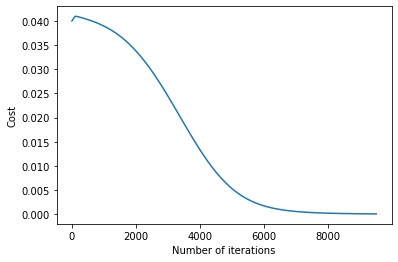

------------------------------
TRAINING MODEL
------------------------------

Output prediksi hidden layer : 
------------------------------
[[0.4749818  0.4749818  0.4749818  0.4749818  0.4749818  0.4749818
  0.4749818  0.4749818 ]
 [0.45654812 0.45654812 0.45654812 0.45654812 0.45654812 0.45654812
  0.45654812 0.45654812]
 [0.38763124 0.38763124 0.38763124 0.38763124 0.38763124 0.38763124
  0.38763124 0.38763124]
 [0.58811593 0.58811593 0.58811593 0.58811593 0.58811593 0.58811593
  0.58811593 0.58811593]
 [0.4986045  0.4986045  0.4986045  0.4986045  0.4986045  0.4986045
  0.4986045  0.4986045 ]
 [0.4722625  0.4722625  0.4722625  0.4722625  0.4722625  0.4722625
  0.4722625  0.4722625 ]
 [0.5559417  0.5559417  0.5559417  0.5559417  0.5559417  0.5559417
  0.5559417  0.5559417 ]
 [0.54153186 0.54153186 0.54153186 0.54153186 0.54153186 0.54153186
  0.54153186 0.54153186]
 [0.64843494 0.64843494 0.64843494 0.64843494 0.64843494 0.64843494
  0.64843494 0.64843494]
 [0.43553767 0.43553767 0.

In [18]:
# Call function 
v, w, b_k, b_j = train_model(TRAIN_ITER, w, v, b_j, b_k, y, x)

In [19]:
# Test Model
def test(x_test, y_test, w, v,  b_j, b_k):
    z_prediction = np.dot(x_test, np.transpose(w)) + b_j
    f_z_prediction = f_activation(z_prediction)
    
    y_prediction = np.dot(f_z_prediction, np.transpose(v)) + b_k
    f_y_prediction =  f_activation_output(y_prediction)
    
    rms = rmse(f_y_prediction, y_test)
    
    print('-'*30)
    print('TESTING MODEL')
    print('-'*30)
    print('\nOutput prediksi hidden layer : ')
    print('-'*30)
    print(z_prediction)
    print('\nOutput prediksi output layer : ')
    print('-'*30)
    print(y_prediction)
    print('\nOutput bobot dari hidden layer ke output layer : ')
    print('-'*30)
    print(v)
    print('\nOutput bobot dari input layer ke hidden layer : ')
    print('-'*30)
    print(w)
    print('\nOutput bias dari hidden layer ke output layer : ')
    print('-'*30)
    print(b_k)
    print('\nOutput bias dari input layer ke hidden layer : ')
    print('-'*30)
    print(b_j)
    print('-'*30)
    print()
    print('-'*30)
    print('AKURASI : ' + str(rms) + '%')
    print('-'*30)
    return f_y_prediction

In [20]:
# Call function
y_prediction_test = np.zeros(len(xx), np.float32)
y_prediction_test = test(xx, yy, w, v,  b_j, b_k)

------------------------------
TESTING MODEL
------------------------------

Output prediksi hidden layer : 
------------------------------
[[ 0.08941853  0.08941853  0.08941853  0.08941853  0.08941853  0.08941853
   0.08941853  0.08941853]
 [ 0.11290979  0.11290979  0.11290979  0.11290979  0.11290979  0.11290979
   0.11290979  0.11290979]
 [-0.3102603  -0.3102603  -0.3102603  -0.3102603  -0.3102603  -0.3102603
  -0.3102603  -0.3102603 ]
 [ 0.09645289  0.09645289  0.09645289  0.09645289  0.09645289  0.09645289
   0.09645289  0.09645289]
 [ 0.1919775   0.1919775   0.1919775   0.1919775   0.1919775   0.1919775
   0.1919775   0.1919775 ]
 [ 0.69939744  0.69939744  0.69939744  0.69939744  0.69939744  0.69939744
   0.69939744  0.69939744]
 [-0.5884217  -0.5884217  -0.5884217  -0.5884217  -0.5884217  -0.5884217
  -0.5884217  -0.5884217 ]
 [ 0.5527487   0.5527487   0.5527487   0.5527487   0.5527487   0.5527487
   0.5527487   0.5527487 ]
 [ 0.11344838  0.11344838  0.11344838  0.11344838  0.113

In [21]:
# Denormalize prediction
j = datatest['J']
denorm = []
for i in range(len(data_test)):
    y[i] = y_prediction_test[i] * (j.max(axis=0) - j.min(axis=0)) + j.min(axis=0) 
    denorm.append(y[i])
print(denorm)

[1493892.1, 1499377.4, 1400917.4, 1495535.2, 1517777.9, 1630340.5, 1339063.5, 1599175.8, 1499503.0, 1518766.4, 1674222.9, 1538461.1]


In [22]:
# Output prediction File
submission = pd.DataFrame({
    "Time" : datatest['B'],
    "Truth" : datatest['J'],
    "Prediction": denorm
    })

submission.head(5)

# Export it in a 'Comma Separated Values' (CSV) file
submission.to_csv(r'/home/systemcommand/anggy/app/data/pred(11-8-1-9600).csv', index=False)
# Creating a link to download the .csv file we created
from IPython.display import FileLink
FileLink(r'/home/systemcommand/anggy/app/data/pred(11-8-1-9600).csv')

/home/systemcommand/anggy/app/data/pred(11-8-1-9600).csv

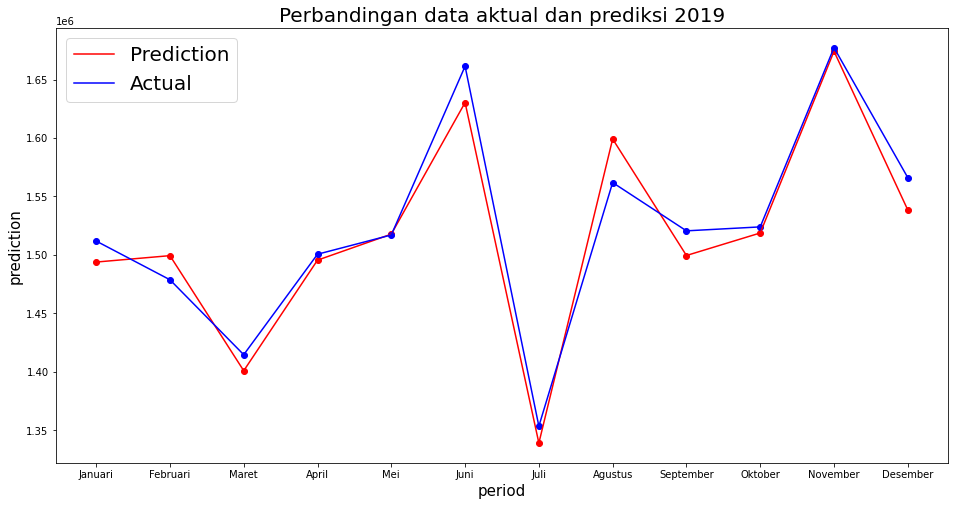

In [23]:
# Plot prediction and truth data
dataa = pd.read_csv('/home/systemcommand/anggy/app/data/pred(11-8-1-9600).csv')

x = dataa['Truth']
x2 = dataa['Prediction']
y = dataa['Time']

plt.figure(figsize=(16,8))
plt.scatter(y,x2,c='red')
plt.plot(y,x2,c='red', label="Prediction")
plt.scatter(y,x,c='blue')
plt.plot(y,x,c='blue', label="Actual")
plt.legend(loc='upper left', fontsize = 20)
plt.ylabel('prediction', fontsize = 15)
plt.xlabel('period', fontsize = 15)
plt.title('Perbandingan data aktual dan prediksi 2019', fontsize = 20)
plt.xticks()
plt.show()